In [362]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [363]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Data exploration

In [365]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [366]:
df.smoking_history.value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


In [367]:
df_copy = df.loc[df.smoking_history!='No Info']

In [368]:
df_copy.gender.value_counts()

,count
gender,
Female,38852
Male,25320
Other,12


In [369]:
df_copy= df_copy.loc[df_copy.gender!='Other']

In [370]:
df_copy.gender.value_counts()

,count
gender,
Female,38852
Male,25320


In [371]:
import matplotlib.pyplot as plt
import seaborn as sns

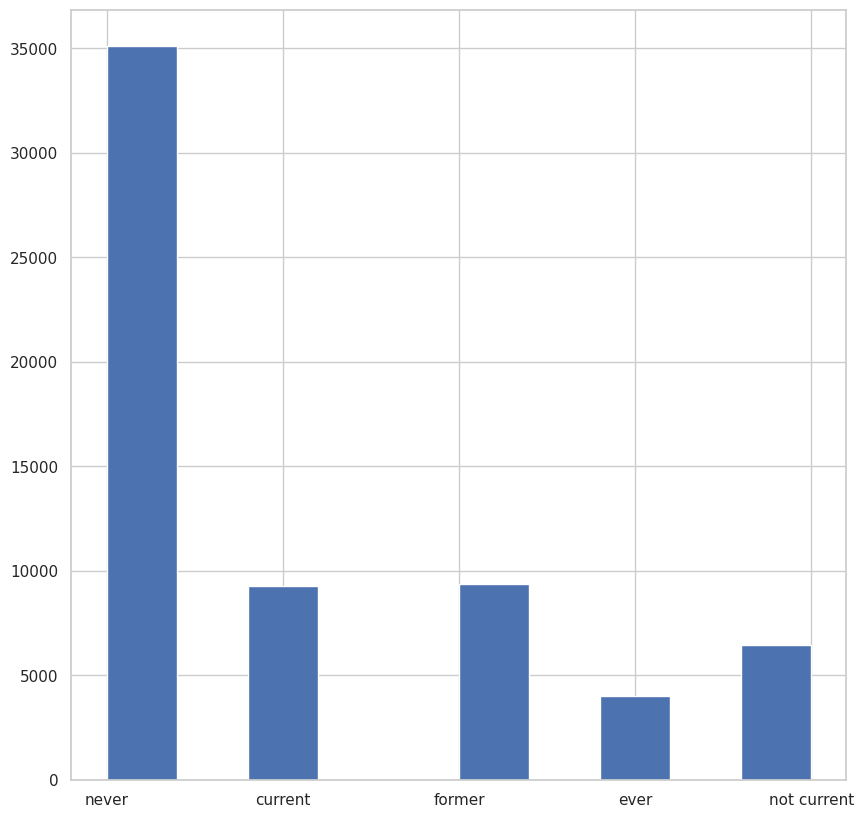

In [372]:
plt.figure(figsize=(10,10))
plt.hist(df_copy['smoking_history'])
plt.show()

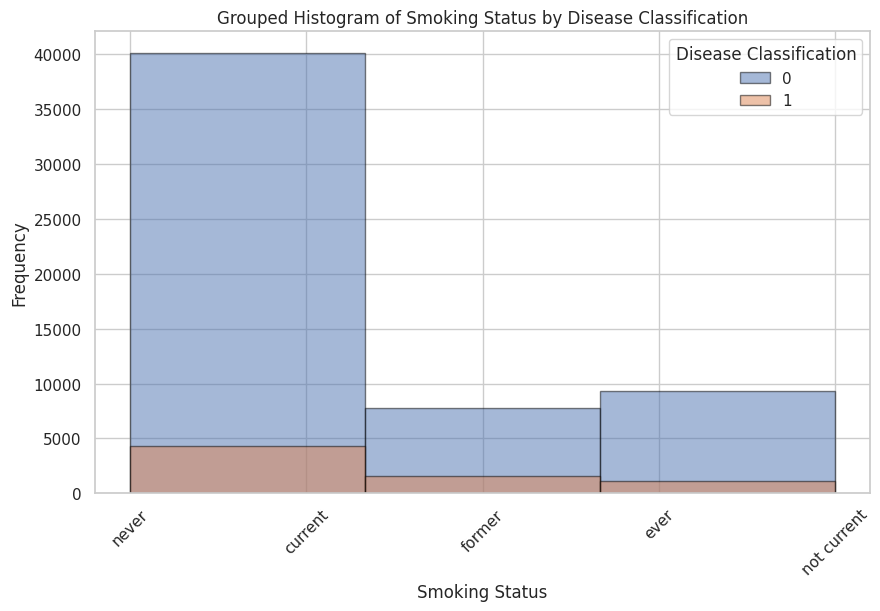

In [373]:
# Create a grouped histogram
plt.figure(figsize=(10, 6))

# Plot histograms for each disease classification
for label, group_data in df_copy.groupby('diabetes'):
    plt.hist(group_data['smoking_history'], bins=3, alpha=0.5, label=f'{label}', edgecolor='black')

# Add labels and title
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.title('Grouped Histogram of Smoking Status by Disease Classification')
plt.xticks(rotation=45)
plt.legend(title='Disease Classification')
plt.show()


In [374]:
# Calculate the proportion of each smoking status
smoking_counts = df_copy['smoking_history'].value_counts()
diabetes_counts = df_copy['diabetes'].value_counts()

# Prepare data for pie chart
smoking_labels = smoking_counts.index
smoking_sizes = smoking_counts.values

diabetes_labels = ['No Diabetes', 'Diabetes']
diabetes_sizes = diabetes_counts.values


<ipython-input-375-2a73a74c4da7>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot


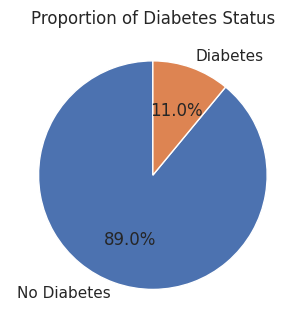

In [375]:
plt.pie(smoking_sizes, labels=smoking_labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Smoking Status')

# Create a pie chart for Diabetes Status
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie(diabetes_sizes, labels=diabetes_labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diabetes Status')

plt.tight_layout()
plt.show()

In [376]:
df_copy.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

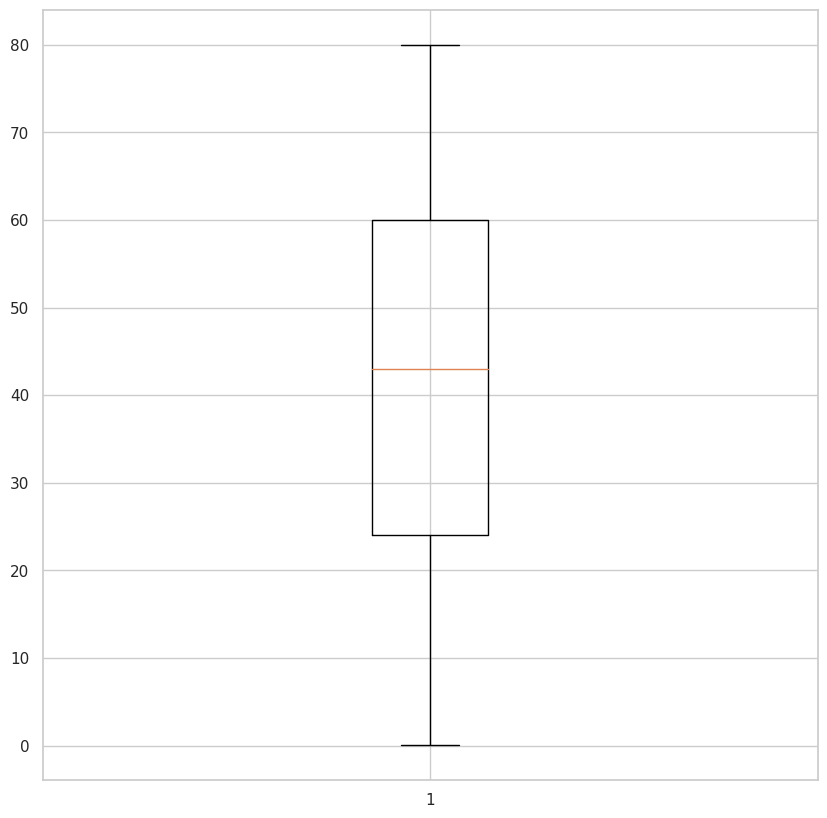

In [377]:
plt.figure(figsize=(10,10))
plt.boxplot(df['age'])
plt.show()

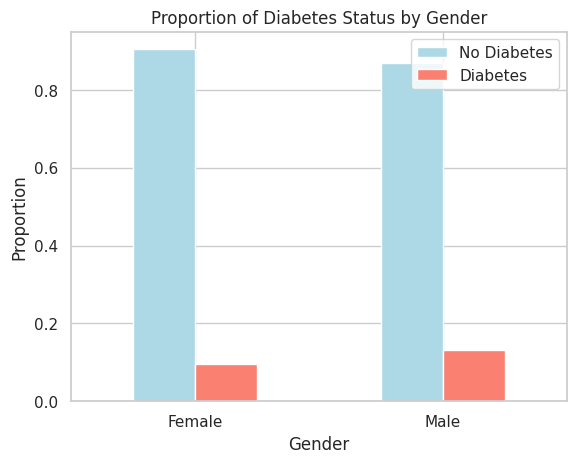

In [378]:
# Calculate the total counts for each gender
total_counts = df_copy['gender'].value_counts()

# Calculate the counts of diabetes for each gender
diabetes_counts = df_copy.groupby('gender')['diabetes'].value_counts().unstack().fillna(0)

# Calculate proportions
diabetes_proportions = diabetes_counts.div(total_counts, axis=0)

# Create a bar chart for diabetes status by gender
diabetes_proportions.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Proportion of Diabetes Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()


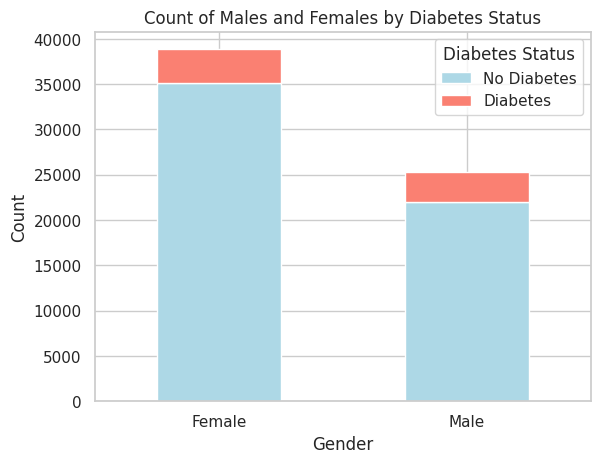

In [379]:
# Calculate counts of males and females for each diabetes status
counts = df_copy.groupby(['gender', 'diabetes']).size().unstack(fill_value=0)
counts.columns = ['No Diabetes', 'Diabetes']
# Create a stacked bar chart
counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Count of Males and Females by Diabetes Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Diabetes Status')
plt.show()




In [380]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64172 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               64172 non-null  object 
 1   age                  64172 non-null  float64
 2   hypertension         64172 non-null  int64  
 3   heart_disease        64172 non-null  int64  
 4   smoking_history      64172 non-null  object 
 5   bmi                  64172 non-null  float64
 6   HbA1c_level          64172 non-null  float64
 7   blood_glucose_level  64172 non-null  int64  
 8   diabetes             64172 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.9+ MB


In [381]:
df_copy['hypertension'].describe()

,hypertension
count,64172.000000
mean,0.097909
std,0.297194
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


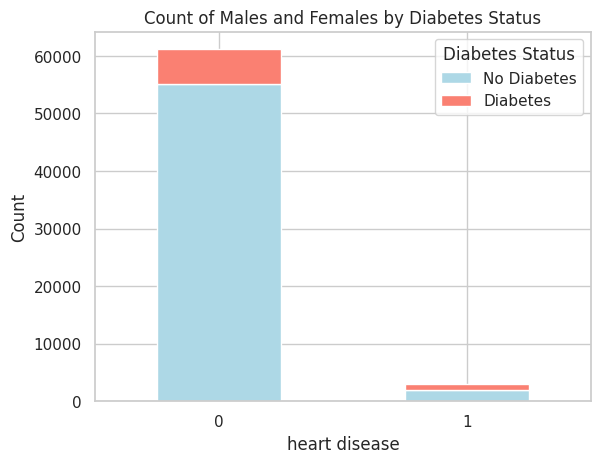

In [382]:
counts = df_copy.groupby(['heart_disease', 'diabetes']).size().unstack(fill_value=0)
counts.columns = ['No Diabetes', 'Diabetes']
# Create a stacked bar chart
counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Count of Males and Females by Diabetes Status')
plt.xlabel('heart disease')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Diabetes Status')
plt.show()

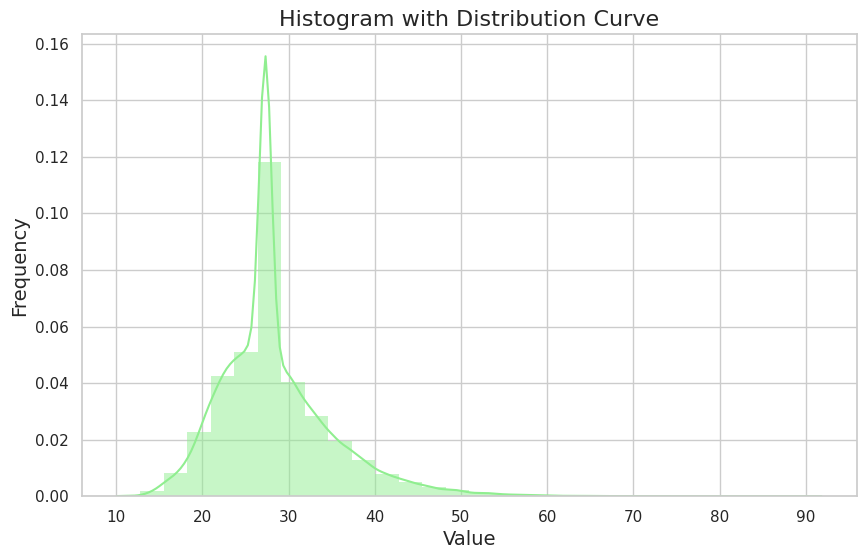

In [383]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['bmi'], bins=30, kde=True, color='lightgreen', stat='density', linewidth=0)

# Add a title and labels
plt.title('Histogram with Distribution Curve', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


In [384]:
df_copy.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

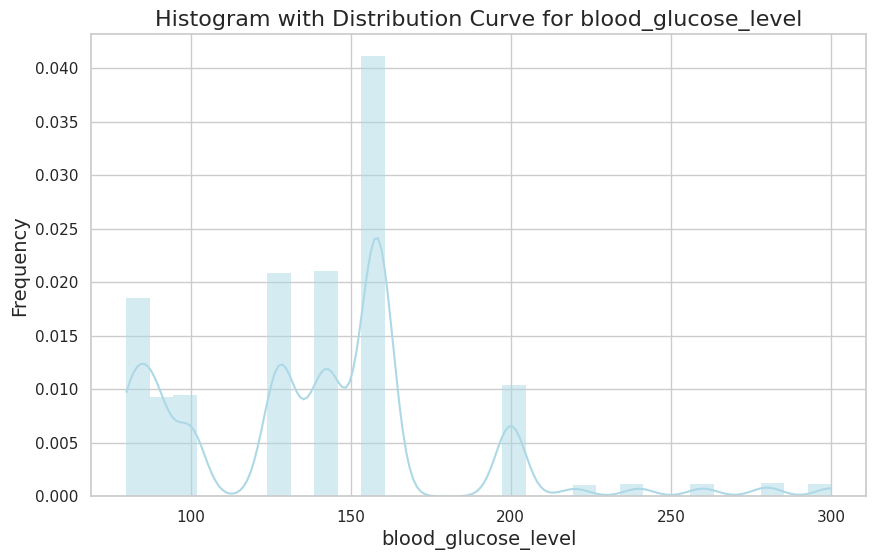

In [385]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['blood_glucose_level'], bins=30, kde=True, color='lightblue', stat='density', linewidth=0)

# Add a title and labels
plt.title('Histogram with Distribution Curve for blood_glucose_level', fontsize=16)
plt.xlabel('blood_glucose_level', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


Data Preprocessing

In [386]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_copy['smoking_history'] = label_encoder.fit_transform(df_copy['smoking_history'])
df_copy['smoking_history']

,smoking_history
0,3
2,3
3,0
4,0
5,3
...,...
99992,3
99993,3
99997,2
99998,3


In [387]:
from sklearn.preprocessing import OneHotEncoder
df_copy = pd.get_dummies(df_copy, columns=['gender'])

Correlation heat map

In [388]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64172 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  64172 non-null  float64
 1   hypertension         64172 non-null  int64  
 2   heart_disease        64172 non-null  int64  
 3   smoking_history      64172 non-null  int64  
 4   bmi                  64172 non-null  float64
 5   HbA1c_level          64172 non-null  float64
 6   blood_glucose_level  64172 non-null  int64  
 7   diabetes             64172 non-null  int64  
 8   gender_Female        64172 non-null  bool   
 9   gender_Male          64172 non-null  bool   
dtypes: bool(2), float64(3), int64(5)
memory usage: 4.5 MB


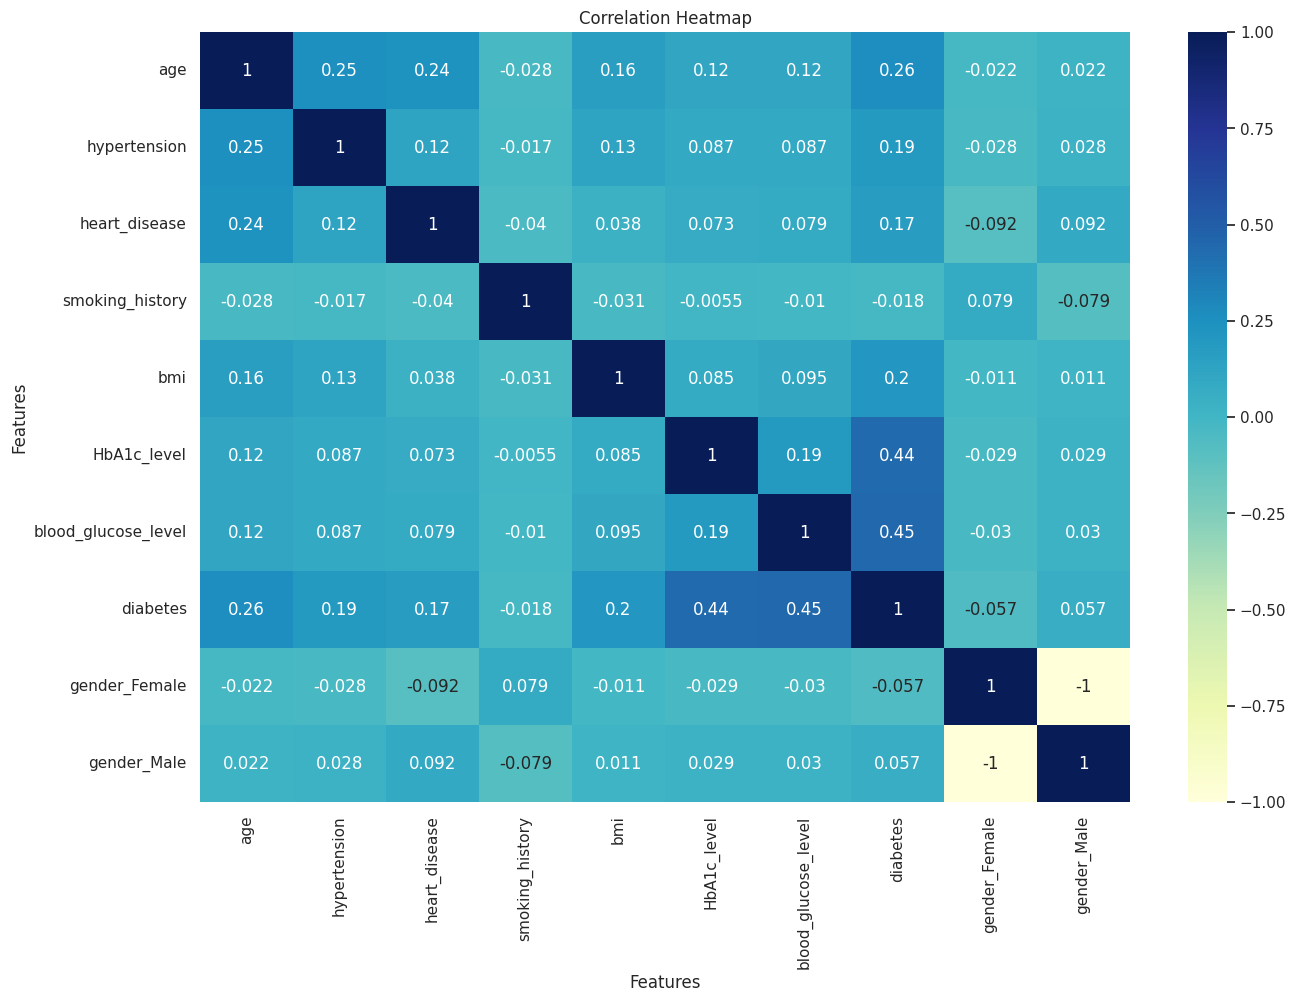

In [389]:
# correlation heat map
corr_matrix = df_copy.corr()
plt.figure(figsize=(15,10))
# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

# Add labels and title
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [390]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64172 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  64172 non-null  float64
 1   hypertension         64172 non-null  int64  
 2   heart_disease        64172 non-null  int64  
 3   smoking_history      64172 non-null  int64  
 4   bmi                  64172 non-null  float64
 5   HbA1c_level          64172 non-null  float64
 6   blood_glucose_level  64172 non-null  int64  
 7   diabetes             64172 non-null  int64  
 8   gender_Female        64172 non-null  bool   
 9   gender_Male          64172 non-null  bool   
dtypes: bool(2), float64(3), int64(5)
memory usage: 4.5 MB


In [391]:
df_copy = df_copy.drop(['smoking_history','heart_disease'],axis=1)

In [392]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64172 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  64172 non-null  float64
 1   hypertension         64172 non-null  int64  
 2   bmi                  64172 non-null  float64
 3   HbA1c_level          64172 non-null  float64
 4   blood_glucose_level  64172 non-null  int64  
 5   diabetes             64172 non-null  int64  
 6   gender_Female        64172 non-null  bool   
 7   gender_Male          64172 non-null  bool   
dtypes: bool(2), float64(3), int64(3)
memory usage: 3.5 MB


**Model training**

In [393]:
from sklearn.model_selection import train_test_split

X = df_copy.drop('diabetes',axis=1)
y = df_copy['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [394]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

train_pred = logistic_model.predict(X_train)
test_pred = logistic_model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy:", accuracy_score(y_test, test_pred))



Training Accuracy: 0.9494516625435846
Testing Accuracy: 0.9485001947798987


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [395]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")



Training Accuracy: 1.00
Test Accuracy: 0.94


In [396]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = rf_classifier.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")



Training Accuracy: 1.00
Test Accuracy: 0.96


In [398]:
import pickle

In [399]:
data = {"model": rf_classifier, "label_encoder": label_encoder}
with open('model_rfc.pkl', 'wb') as file:
    pickle.dump(data, file)

In [404]:
with open('model_rfc.pkl', 'rb') as file:
    data = pickle.load(file)

classifier_loaded = data["model"]
label_encoder = data["label_encoder"]


In [405]:
label_encoder

LabelEncoder()